In [1]:
#Necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
#Read in revenue dataset
revenue = pd.read_csv(os.path.join("https://download.data.world/s/n5fpewgugtbhryonfxhkg626fvh22s"))

In [3]:
#Read in character dataset
characters = pd.read_excel(os.path.join('Data', 'Disney_Princesses.xlsx'))

In [4]:
#Correcting column name
characters = characters.rename(columns={'Vehicle': 'movie_title'})

In [35]:
#Merging datasets
movie = pd.merge(characters, revenue)

In [16]:
#Removing 2015 Cinderella to avoid duplicates
movie = movie.drop([1])

In [17]:
#Concerting column floats to int
movie['total_gross'] = movie['total_gross'].astype(int)
movie['inflation_adjusted_gross'] = movie['inflation_adjusted_gross'].astype(int)

In [36]:
#Rounding currency to full number
movie['total_gross'] = round(movie['total_gross'])
movie['inflation_adjusted_gross'] = round(movie['inflation_adjusted_gross'])

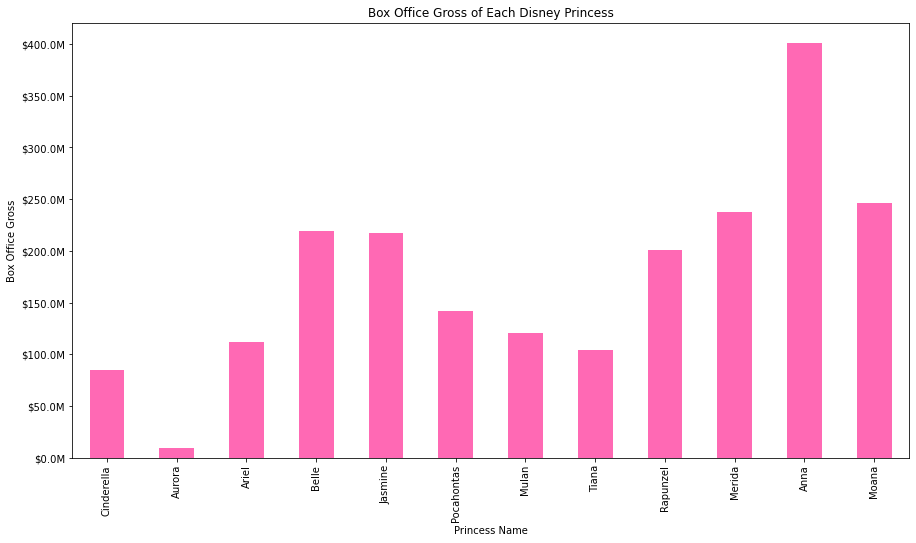

In [32]:
#Function to convert y-axis ticks to millions
def millions(x, pos):
    return '${:1.1f}M'.format(x*1e-6)

#Plot box office gross graph
ax = movie.plot.bar(x='Name', y='total_gross', figsize=(15, 8), color='hotpink')
ax.yaxis.set_major_formatter(millions)
plt.title('Box Office Gross of Each Disney Princess')
plt.xlabel('Princess Name')
plt.ylabel('Box Office Gross')
ax.get_legend().remove()

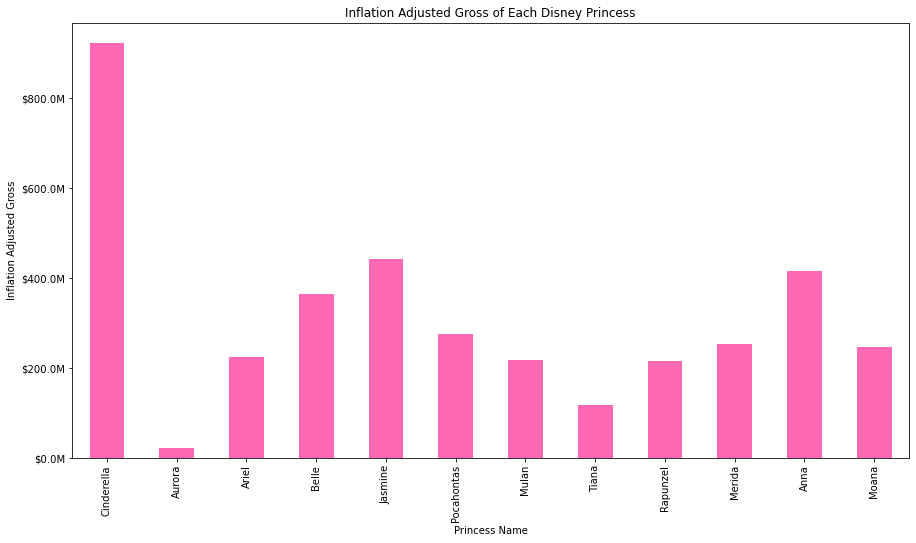

In [34]:
#Plot adjusted inflation graph
ax = movie.plot.bar(x='Name', y='inflation_adjusted_gross', figsize=(15, 8), color='hotpink')
ax.yaxis.set_major_formatter(millions)
plt.title('Inflation Adjusted Gross of Each Disney Princess')
plt.xlabel('Princess Name')
plt.ylabel('Inflation Adjusted Gross')
ax.get_legend().remove()